# Section 7 Time Series Analysis with Statsmodels

---

## Introduction to Time Series Analysis with Statsmodels

In [5]:
filespath = r"F:\Documentos\Udemy\Python for Time Series Data Analysis\UDEMY_TSA_FINAL\Data"

---

## Introduction to Statsmodels

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [7]:
df = pd.read_csv(filespath+"/macrodata.csv", index_col=0, parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


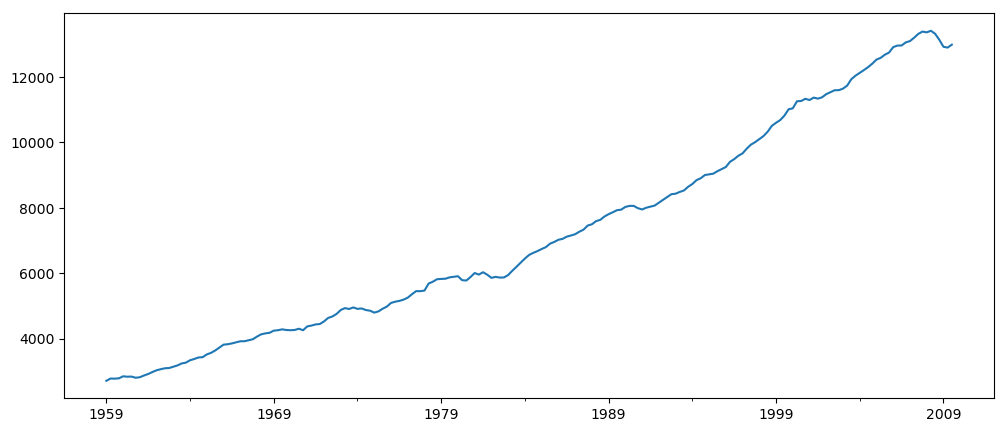

In [9]:
df['realgdp'].plot(figsize=(12,5))

In [10]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [11]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [12]:
type(gdp_trend)

pandas.core.series.Series

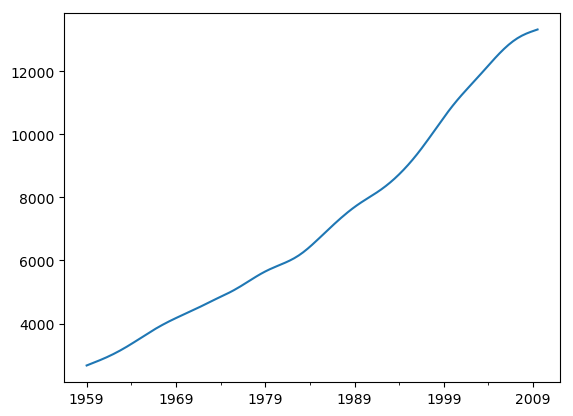

In [15]:
gdp_trend.plot()

In [14]:
df['trend'] = gdp_trend
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


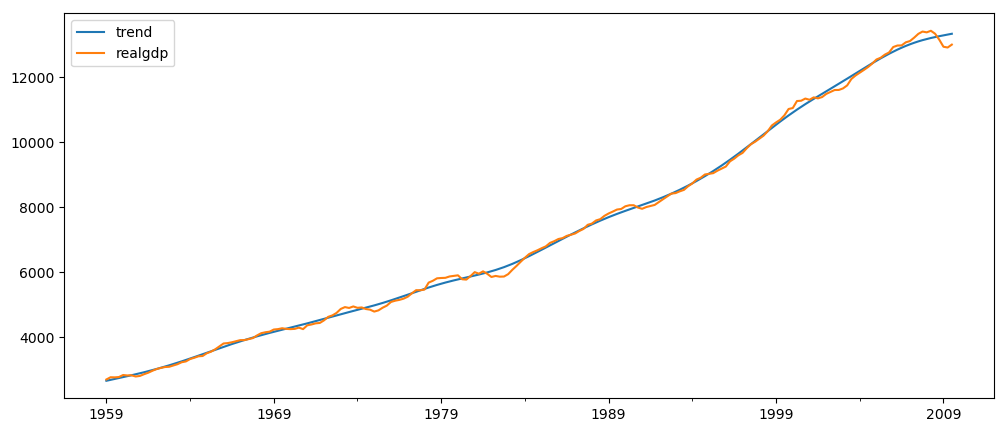

In [16]:
df[['trend','realgdp']].plot(figsize=(12,5))

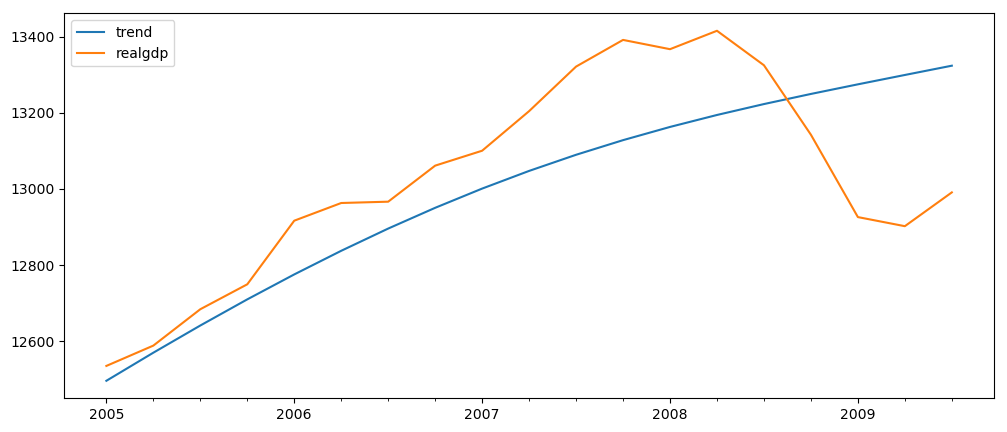

In [17]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5))

---

## ETS Decomposition

ETS Models stands for Error-Trend-Seasonality

In [19]:
import pandas as pd
import numpy as np
%matplotlib inline

In [24]:
airline = pd.read_csv(filespath+"/airline_passengers.csv", index_col='Month', parse_dates=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [25]:
airline = airline.dropna()
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


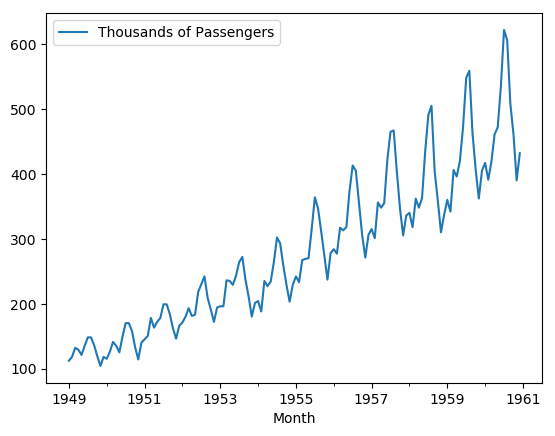

In [26]:
airline.plot()

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
results = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
results

In [29]:
results.trend

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
1949-11-01    129.000000
1949-12-01    129.750000
1950-01-01    131.250000
1950-02-01    133.083333
1950-03-01    134.916667
1950-04-01    136.416667
1950-05-01    137.416667
1950-06-01    138.750000
1950-07-01    140.916667
1950-08-01    143.166667
1950-09-01    145.708333
1950-10-01    148.416667
1950-11-01    151.541667
1950-12-01    154.708333
1951-01-01    157.125000
1951-02-01    159.541667
1951-03-01    161.833333
1951-04-01    164.125000
1951-05-01    166.666667
1951-06-01    169.083333
                 ...    
1958-07-01    381.833333
1958-08-01    383.666667
1958-09-01    386.500000
1958-10-01    390.333333
1958-11-01    394.708333
1958-12-01    398.625000
1959-01-01    402.541667
1959-02-01    407.166667
1959-03-01    411.8

In [30]:
results.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
1949-11-01    0.801178
1949-12-01    0.898824
1950-01-01    0.910230
1950-02-01    0.883625
1950-03-01    1.007366
1950-04-01    0.975906
1950-05-01    0.981378
1950-06-01    1.112776
1950-07-01    1.226556
1950-08-01    1.219911
1950-09-01    1.060492
1950-10-01    0.921757
1950-11-01    0.801178
1950-12-01    0.898824
1951-01-01    0.910230
1951-02-01    0.883625
1951-03-01    1.007366
1951-04-01    0.975906
1951-05-01    0.981378
1951-06-01    1.112776
                ...   
1958-07-01    1.226556
1958-08-01    1.219911
1958-09-01    1.060492
1958-10-01    0.921757
1958-11-01    0.801178
1958-12-01    0.898824
1959-01-01    0.910230
1959-02-01    0.883625
1959-03-01    1.007366
1959-04-01    0.975906
1959-05-01    0.981378
1959-06-01    1.112776
1959-

In [31]:
results.resid

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
1949-11-01    1.006270
1949-12-01    1.011812
1950-01-01    0.962603
1950-02-01    1.071467
1950-03-01    1.037447
1950-04-01    1.014048
1950-05-01    0.926903
1950-06-01    0.965041
1950-07-01    0.983557
1950-08-01    0.973372
1950-09-01    1.022505
1950-10-01    0.972193
1950-11-01    0.938953
1950-12-01    1.006791
1951-01-01    1.013845
1951-02-01    1.064018
1951-03-01    1.091854
1951-04-01    1.017665
1951-05-01    1.051583
1951-06-01    0.946044
                ...   
1958-07-01    1.048384
1958-08-01    1.078970
1958-09-01    0.985654
1958-10-01    0.997797
1958-11-01    0.980294
1958-12-01    0.940569
1959-01-01    0.982518
1959-02-01    0.950574
1959-03-01    0.978528
1959-04-01    0.974644
1959-05-01    1.017764
1959-06-01    0.996861
1959-

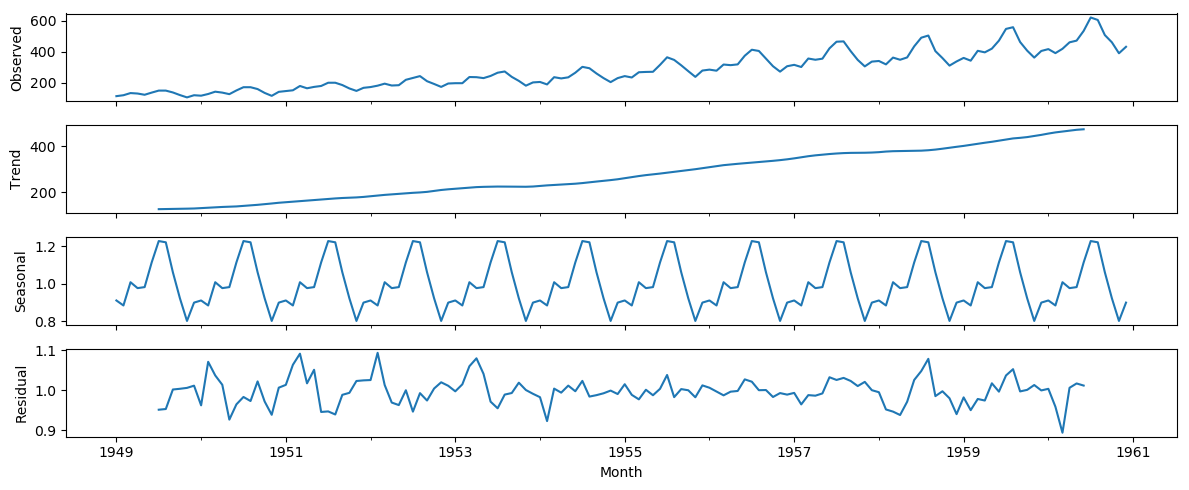

In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

results.plot();

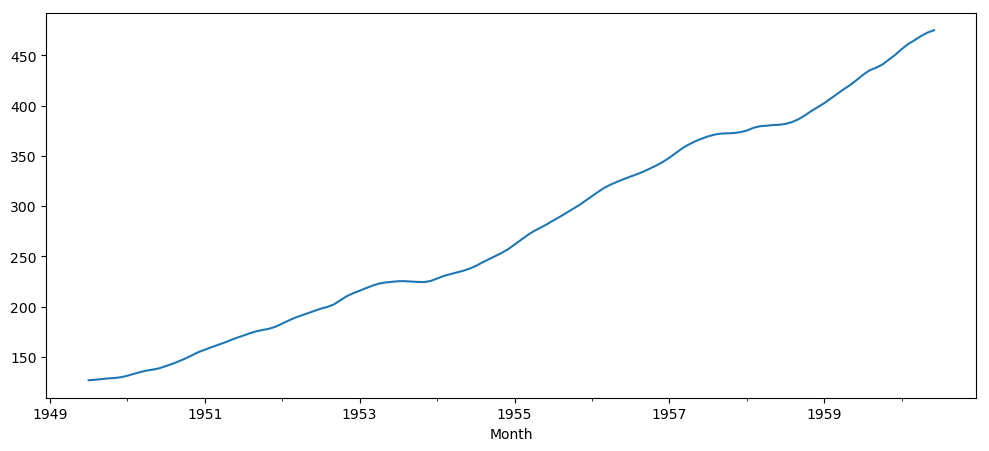

In [36]:
results.trend.plot(figsize=(12,5))

---

## EWMA - Theory

just coments

---

## EWMA - Exponentially Weighte Moving Average

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
airline = pd.read_csv(filespath+"/airline_passengers.csv", index_col='Month')
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [39]:
airline.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [40]:
airline.dropna(inplace=True)

In [41]:
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [42]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [43]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [44]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

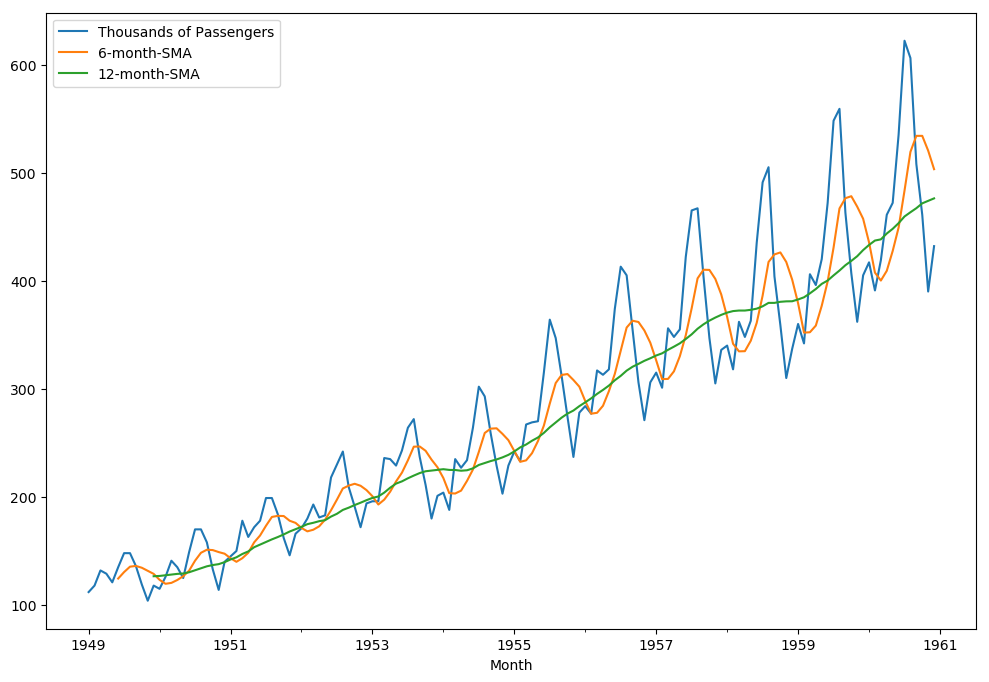

In [47]:
airline.plot(figsize=(12,8))

In [48]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

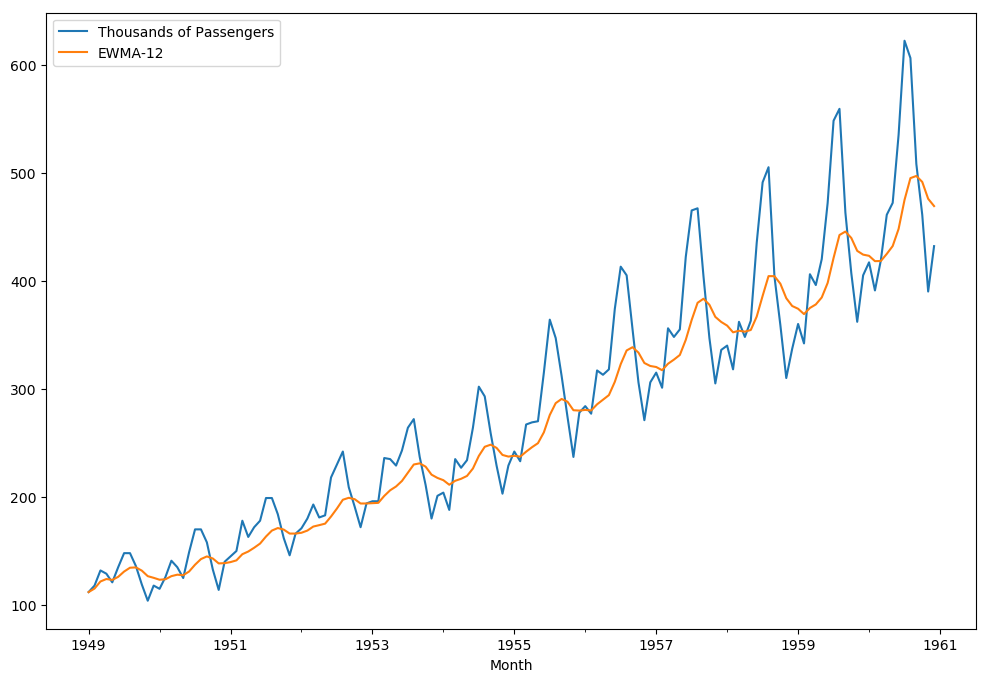

In [50]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(12,8))

---

## Holt - Winters Methods Code Along - Part One

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
airline = pd.read_csv(filespath+"/airline_passengers.csv", index_col='Month')
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


---

## Holt - Winters Methods Code Along - Part Two

---